In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from corr_grid import nsq_grid, regplot_log_wrap, flux_prep
from tools import plotter_wrapper, wind_disk_design, remove_disks

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.formatter.min_exponent'] = 2

In [16]:
# PARAMETERS
LABELS = False
STATS = True

plotter_wrap = plotter_wrapper(regplot_log_wrap, labels=LABELS, stats=STATS)

In [3]:
dataset = pd.read_csv('../Data/by shapes dataset + different lums.csv', sep=',', skipinitialspace=True, na_values=['#NAME?'])
sources = pd.read_csv('../Data/sources.csv')
allwise_w2 = pd.read_csv('../Data/AllWise_W2.csv', na_values=['null'])

new_data = dataset.merge(allwise_w2[['W2_JY', 'W2_JY_ERR']].rename(columns=dict(W2_JY='new_W2_JY', W2_JY_ERR='new_W2_JY_ERR')), left_index=True, right_index=True)

In [4]:
low_mass = ['WaOph6', 'AA Tau', 'IQ Tau']
outliers = ['MWC297', 'TW Hya']

In [12]:
new_data['new_V1_LUM'] = 4 * np.pi * new_data['new_W2_JY'] * new_data['V1_FLUX'] *  new_data['DIST']**2
new_data['new_V1_LUM_ERR'] = new_data['new_V1_LUM'] * np.sqrt((new_data['new_W2_JY_ERR']/new_data['new_W2_JY'])**2 + (new_data['V1_FLUX_ERR']/new_data['V1_FLUX'])**2)

new_data['new_V1_LUM_delta'] = True
new_data.loc[[1, 20, 40], 'new_V1_LUM_delta'] = False
new_data.loc[[1, 20, 40], 'new_V1_LUM_ERR'] = new_data.loc[[1, 20, 40], 'new_V1_LUM']

new_data['new_W2_JY_delta'] = True
new_data.loc[[1, 20, 40], 'new_W2_JY_delta'] = False
new_data.loc[[1, 20, 40], 'new_W2_JY_ERR'] = new_data.loc[[1, 20, 40], 'new_W2_JY']

new_data['new_W2_LUM'] = 4 * np.pi * new_data['DIST']**2 * new_data['new_W2_JY']
new_data['new_W2_LUM_ERR'] = 4 * np.pi * new_data['DIST']**2 * new_data['new_W2_JY_ERR']
new_data['new_W2_LUM_delta'] = new_data['new_W2_JY_delta']

new_data['Rco/Rsub'] = new_data['Rco'] / new_data['RSUBLEMPIR']
new_data['Lstar+Lacc'] = new_data['LSTAR'] + 10**new_data['LOGLACC']

In [13]:
removed_low_mass = remove_disks(new_data, outliers + low_mass)
removed_outliers = remove_disks(new_data, outliers)

In [7]:
scatter_kws = dict(alpha=0.7, zorder=2.5)
line_kws = dict(alpha=0.5, linewidth=3)
regplot_kws = dict(n_boot=1000, seed=31, size=70, ci=None, scatter_kws=scatter_kws, line_kws=line_kws)
markers, hue_order, linestyles, pass_subsets = wind_disk_design()

In [8]:
delta_map = dict(new_W2_LUM='new_W2_LUM_delta', new_V1_LUM='new_V1_LUM_delta')

xvars = ['MSTAR', 'LSTAR', 'LOGLACC']
yvars = ['Rco', 'Rco/Rsub']

labels_map = {'new_V1_LUM': r'CO Lum Proxy',
              'new_W2_LUM': r'W2 Luminosity',
              'V1_NORM_LUM': r'CO Continuum Normalized Lum',
              'Rco': r'R$_{CO}$'}

log_vars = ['MSTAR', 'LSTAR', 'TEFF', 'new_V1_LUM', 'new_W2_LUM', 'V1_NORM_LUM', 'Rco', 'Rco/Rsub']

['MSTAR', 'LSTAR', 'LOGLACC', 'Rco', 'Rco/Rsub'] {}


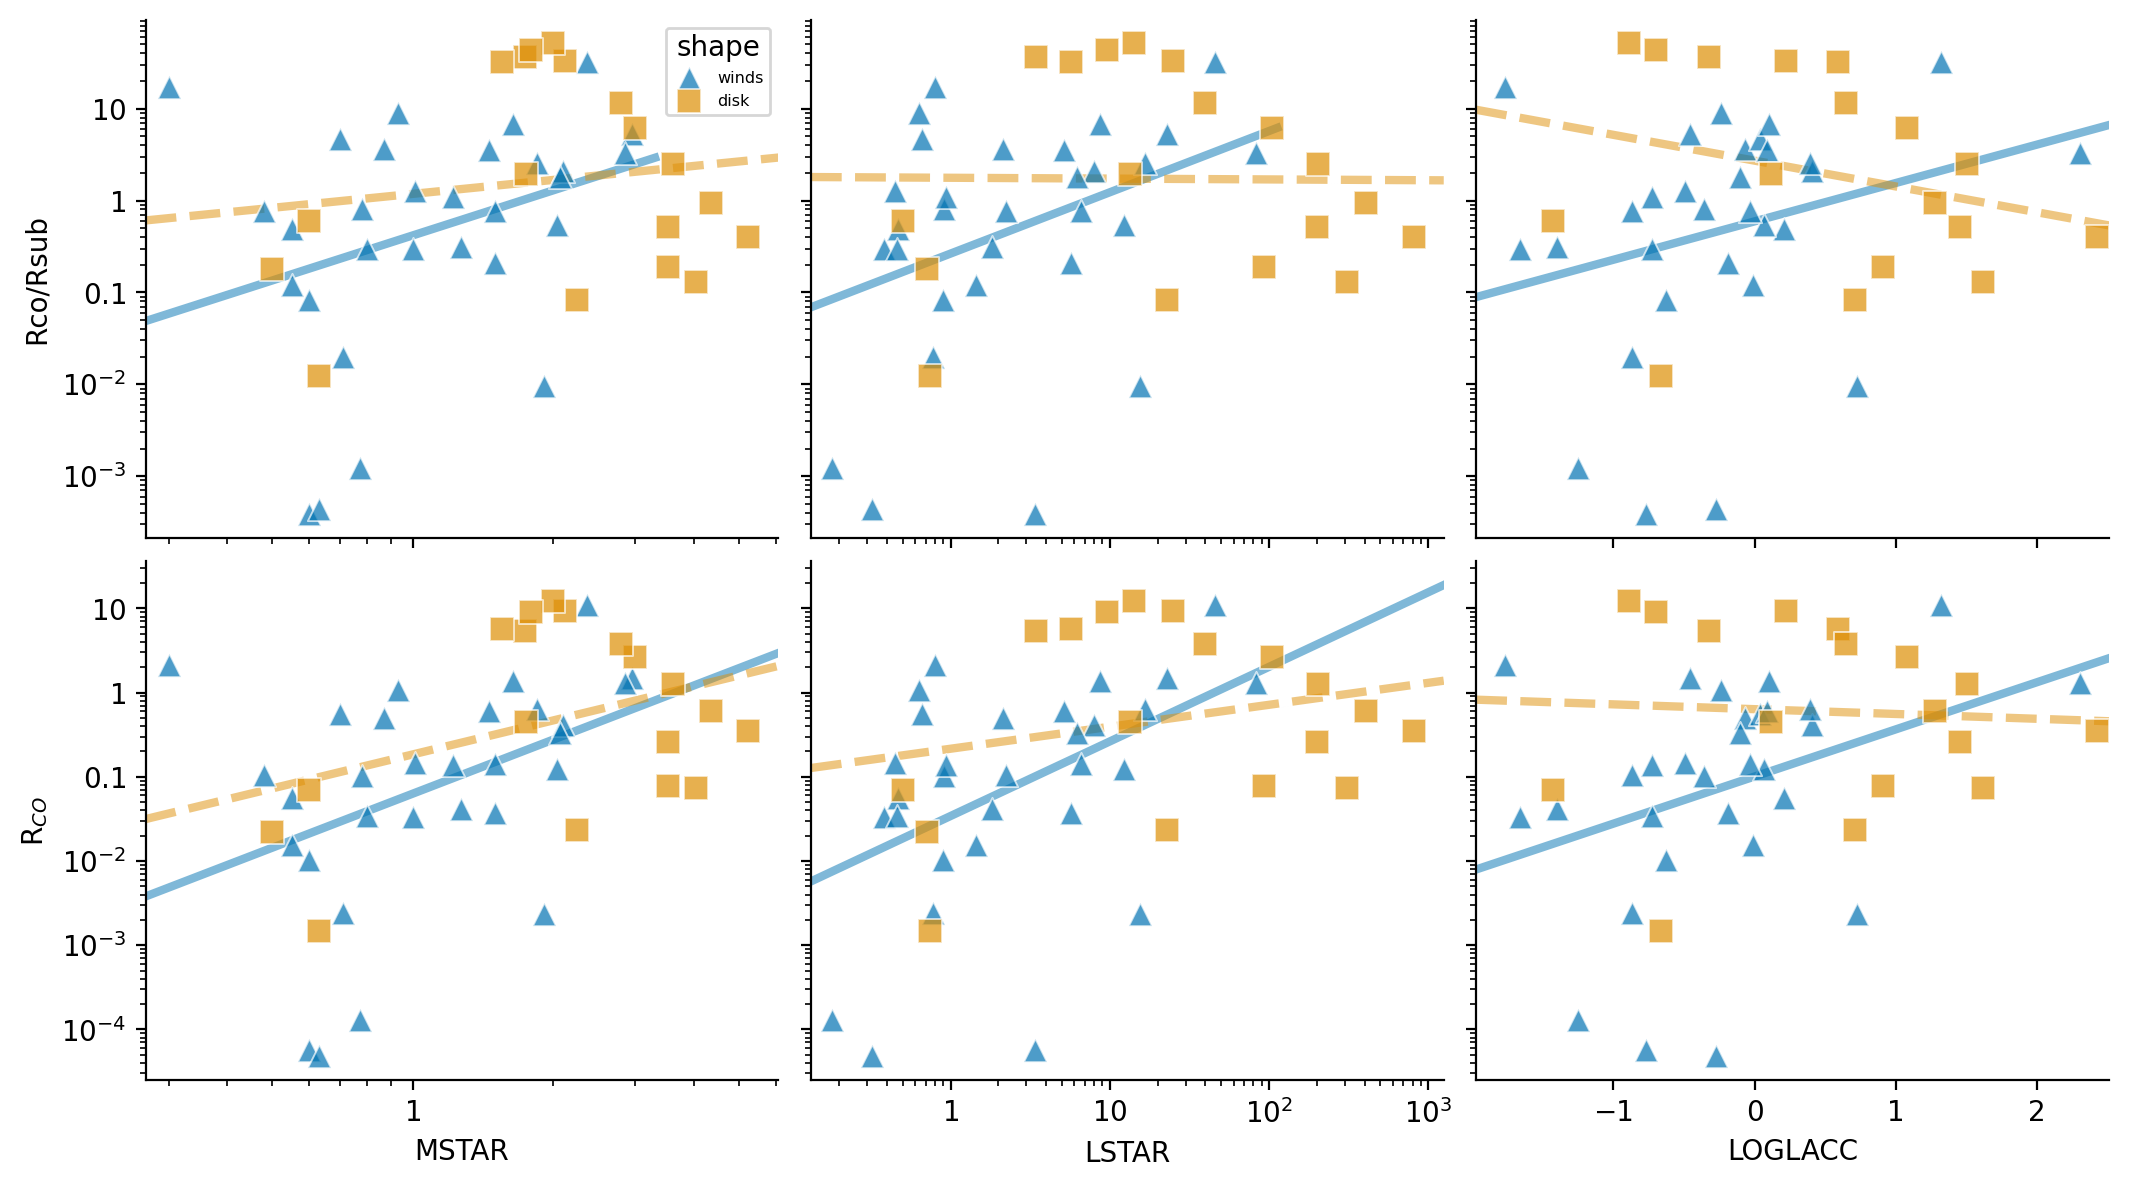

In [9]:
g, error_map = nsq_grid(removed_outliers, hue='shape', hue_order=hue_order, palette='colorblind', x_vars=xvars, y_vars=yvars,
                        log_vars=log_vars, pass_subsets=pass_subsets, labels_map=labels_map, ann_coeff=False, copy=False,
                        qrange=(0, 1), delta_map=delta_map, height=3, legend=True, regplot_kws=regplot_kws, markers=markers,
                        linestyles=linestyles, plotter=plotter_wrap)
# plt.gcf().savefig(r'test.pdf')

['MSTAR', 'LSTAR', 'LOGLACC', 'Rco', 'Rco/Rsub'] {}


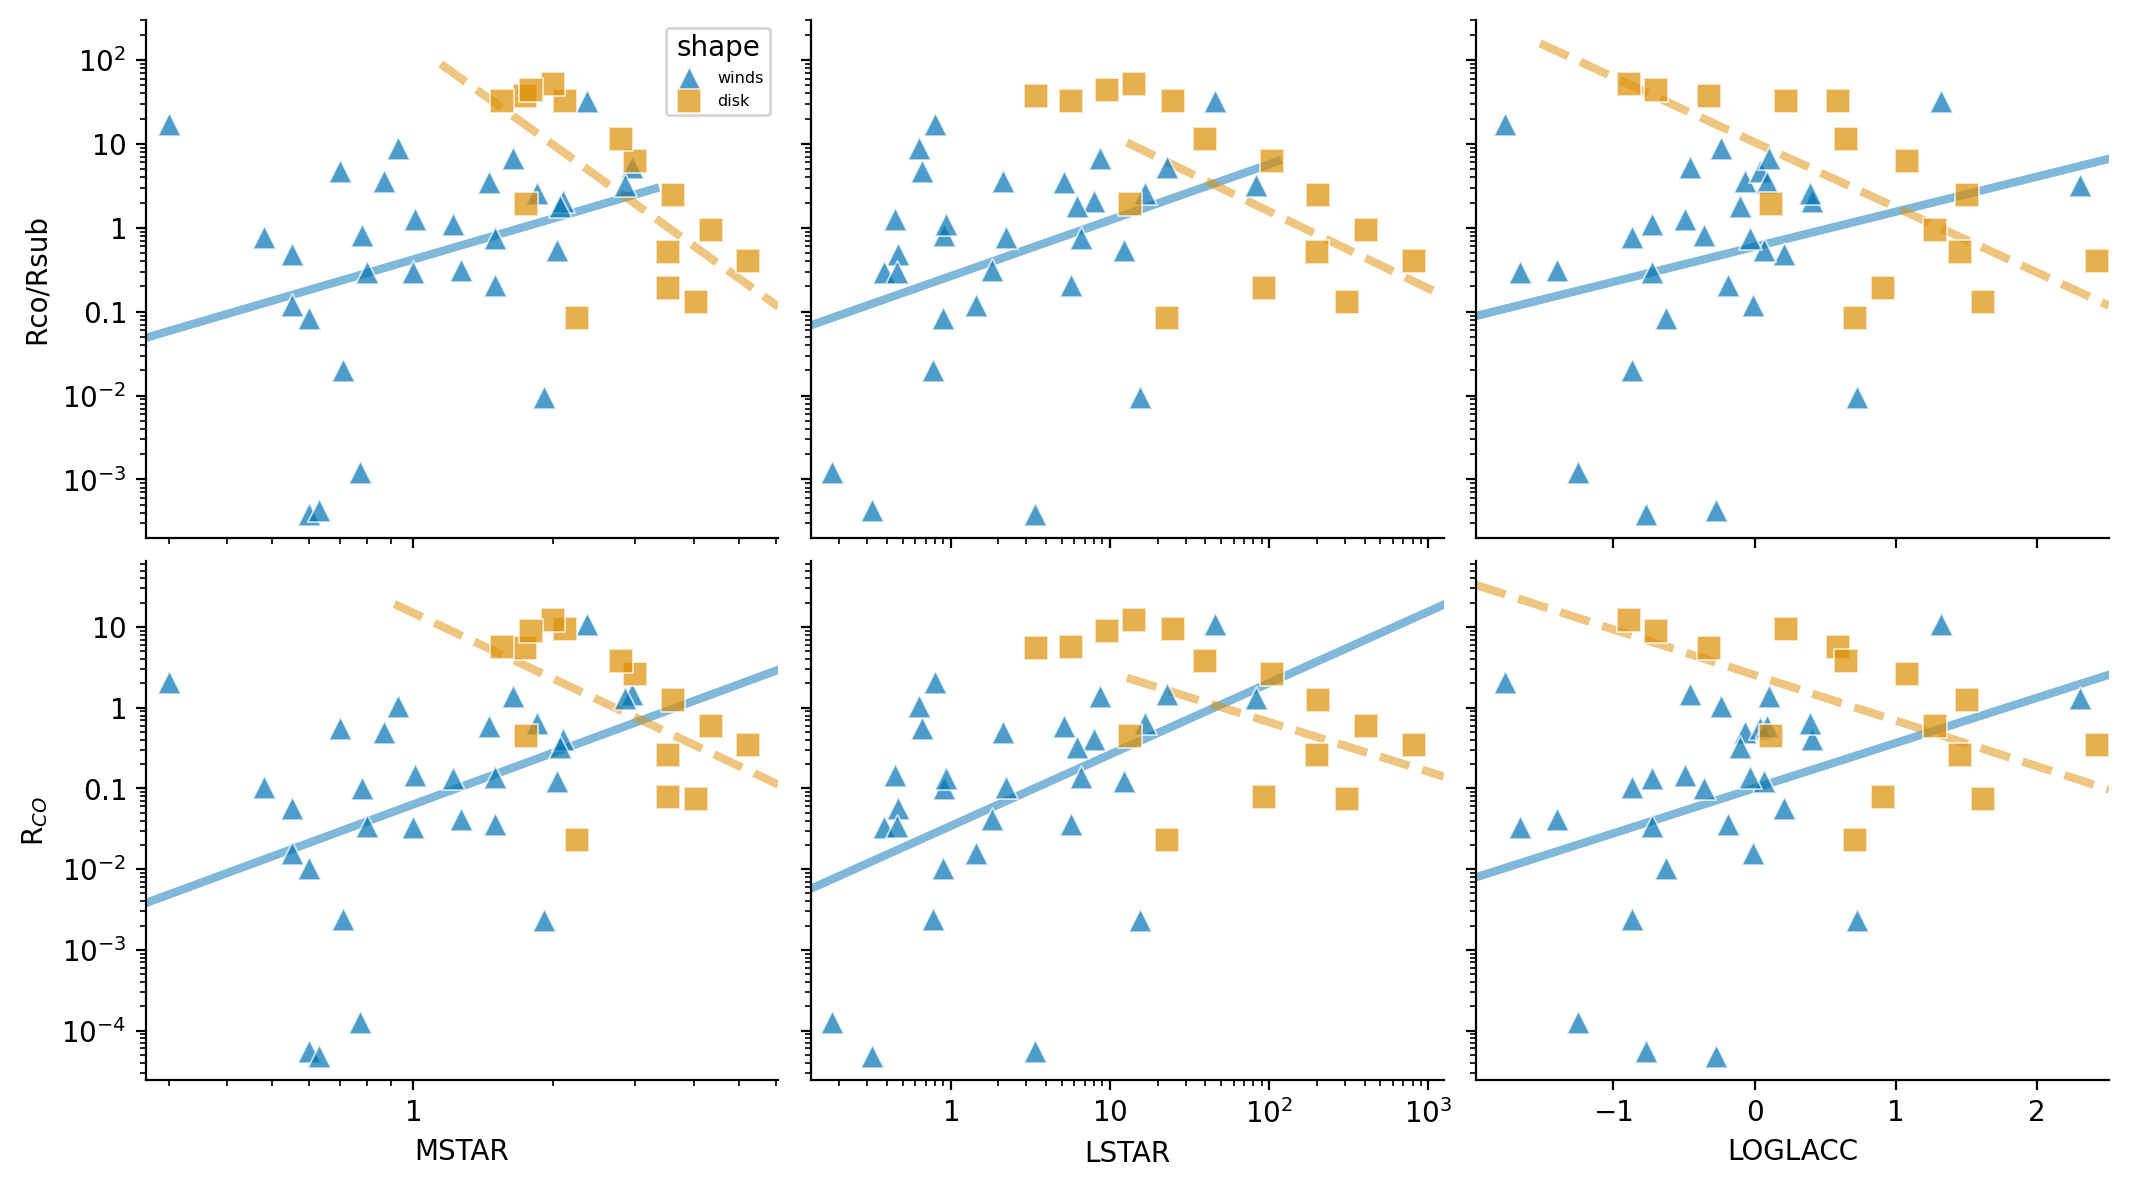

In [11]:
g, error_map = nsq_grid(removed_low_mass, hue='shape', hue_order=hue_order, palette='colorblind', x_vars=xvars, y_vars=yvars,
                        log_vars=log_vars, pass_subsets=pass_subsets, labels_map=labels_map, ann_coeff=False, copy=False,
                        qrange=None, delta_map=delta_map, height=3, legend=True, regplot_kws=regplot_kws, markers=markers,
                        linestyles=linestyles, plotter=plotter_wrap)
# plt.gcf().savefig(r'test.pdf')

['Lstar+Lacc', 'Rco', 'Rco/Rsub'] {}


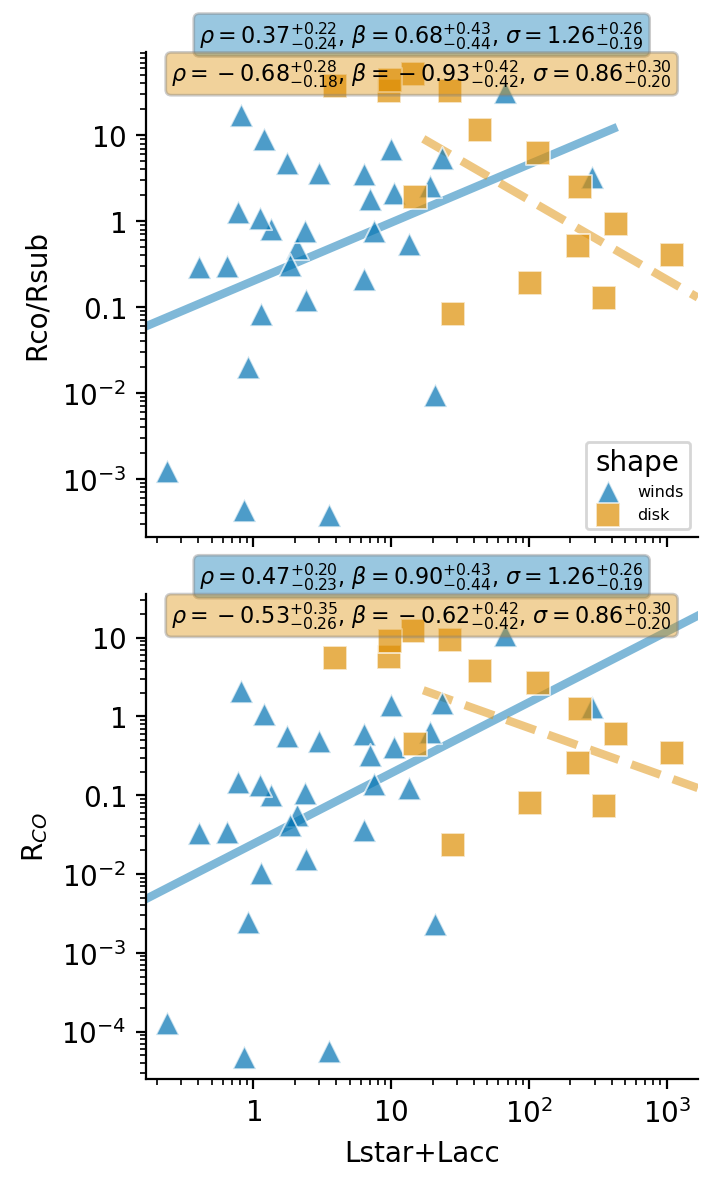

In [17]:
g, error_map = nsq_grid(removed_low_mass, hue='shape', hue_order=hue_order, palette='colorblind', x_vars=['Lstar+Lacc'], y_vars=['Rco', 'Rco/Rsub'],
                        log_vars=['Lstar+Lacc', 'Rco', 'Rco/Rsub'], pass_subsets=pass_subsets, labels_map=labels_map, ann_coeff=False, copy=False,
                        qrange=None, delta_map=delta_map, height=3, legend=True, regplot_kws=regplot_kws, markers=markers,
                        linestyles=linestyles, plotter=plotter_wrap)
# plt.gcf().savefig(r'test.pdf')